In [1]:
import os
import time
import numpy as np
import matplotlib.lines as mlines
from matplotlib import pyplot as plt
from matplotlib.ticker import LogFormatter
from scipy.optimize import differential_evolution, NonlinearConstraint

In [2]:
# def prepare_plot_data(CR_Trials, iterations, trials):
    
#     x_value = np.array([i for i in range(iterations + 1)])
#     y_value = np.zeros(iterations + 1)
    
#     for i in range(iterations + 1):
        
#         for T in range(trials):
            
#             y_value[i] += CR_Trials[T][1][i]
            
#     y_value = y_value / trials
            
#     return x_value, y_value

In [3]:
def prepare_plot_data(CR_Trials, iterations, trials):

    x_value = np.array([i for i in range(iterations+1)])
    y_value = np.zeros((trials, iterations+1))
    y_value = np.array([CR_Trials[T][1][:iterations+1] for T in range(trials)])

    return x_value, np.mean(y_value, axis=0), np.std(y_value, axis=0) / np.sqrt(trials)

In [4]:
d = [100, 150, 200]
trials = 100
iterations = 200
every_point = 25

In [5]:
CR_trials_100 = np.load('../d = 100/CR_Trials_ICML.npy', allow_pickle=True)
CR_trials_150 = np.load('../d = 150/CR_Trials_ICML.npy', allow_pickle=True)
CR_trials_200 = np.load('../d = 200/CR_Trials_ICML.npy', allow_pickle=True)

In [6]:
x_100, CR_100, std_100 = prepare_plot_data(CR_trials_100, iterations, trials)
x_150, CR_150, std_150 = prepare_plot_data(CR_trials_150, iterations, trials)
x_200, CR_200, std_200 = prepare_plot_data(CR_trials_200, iterations, trials)

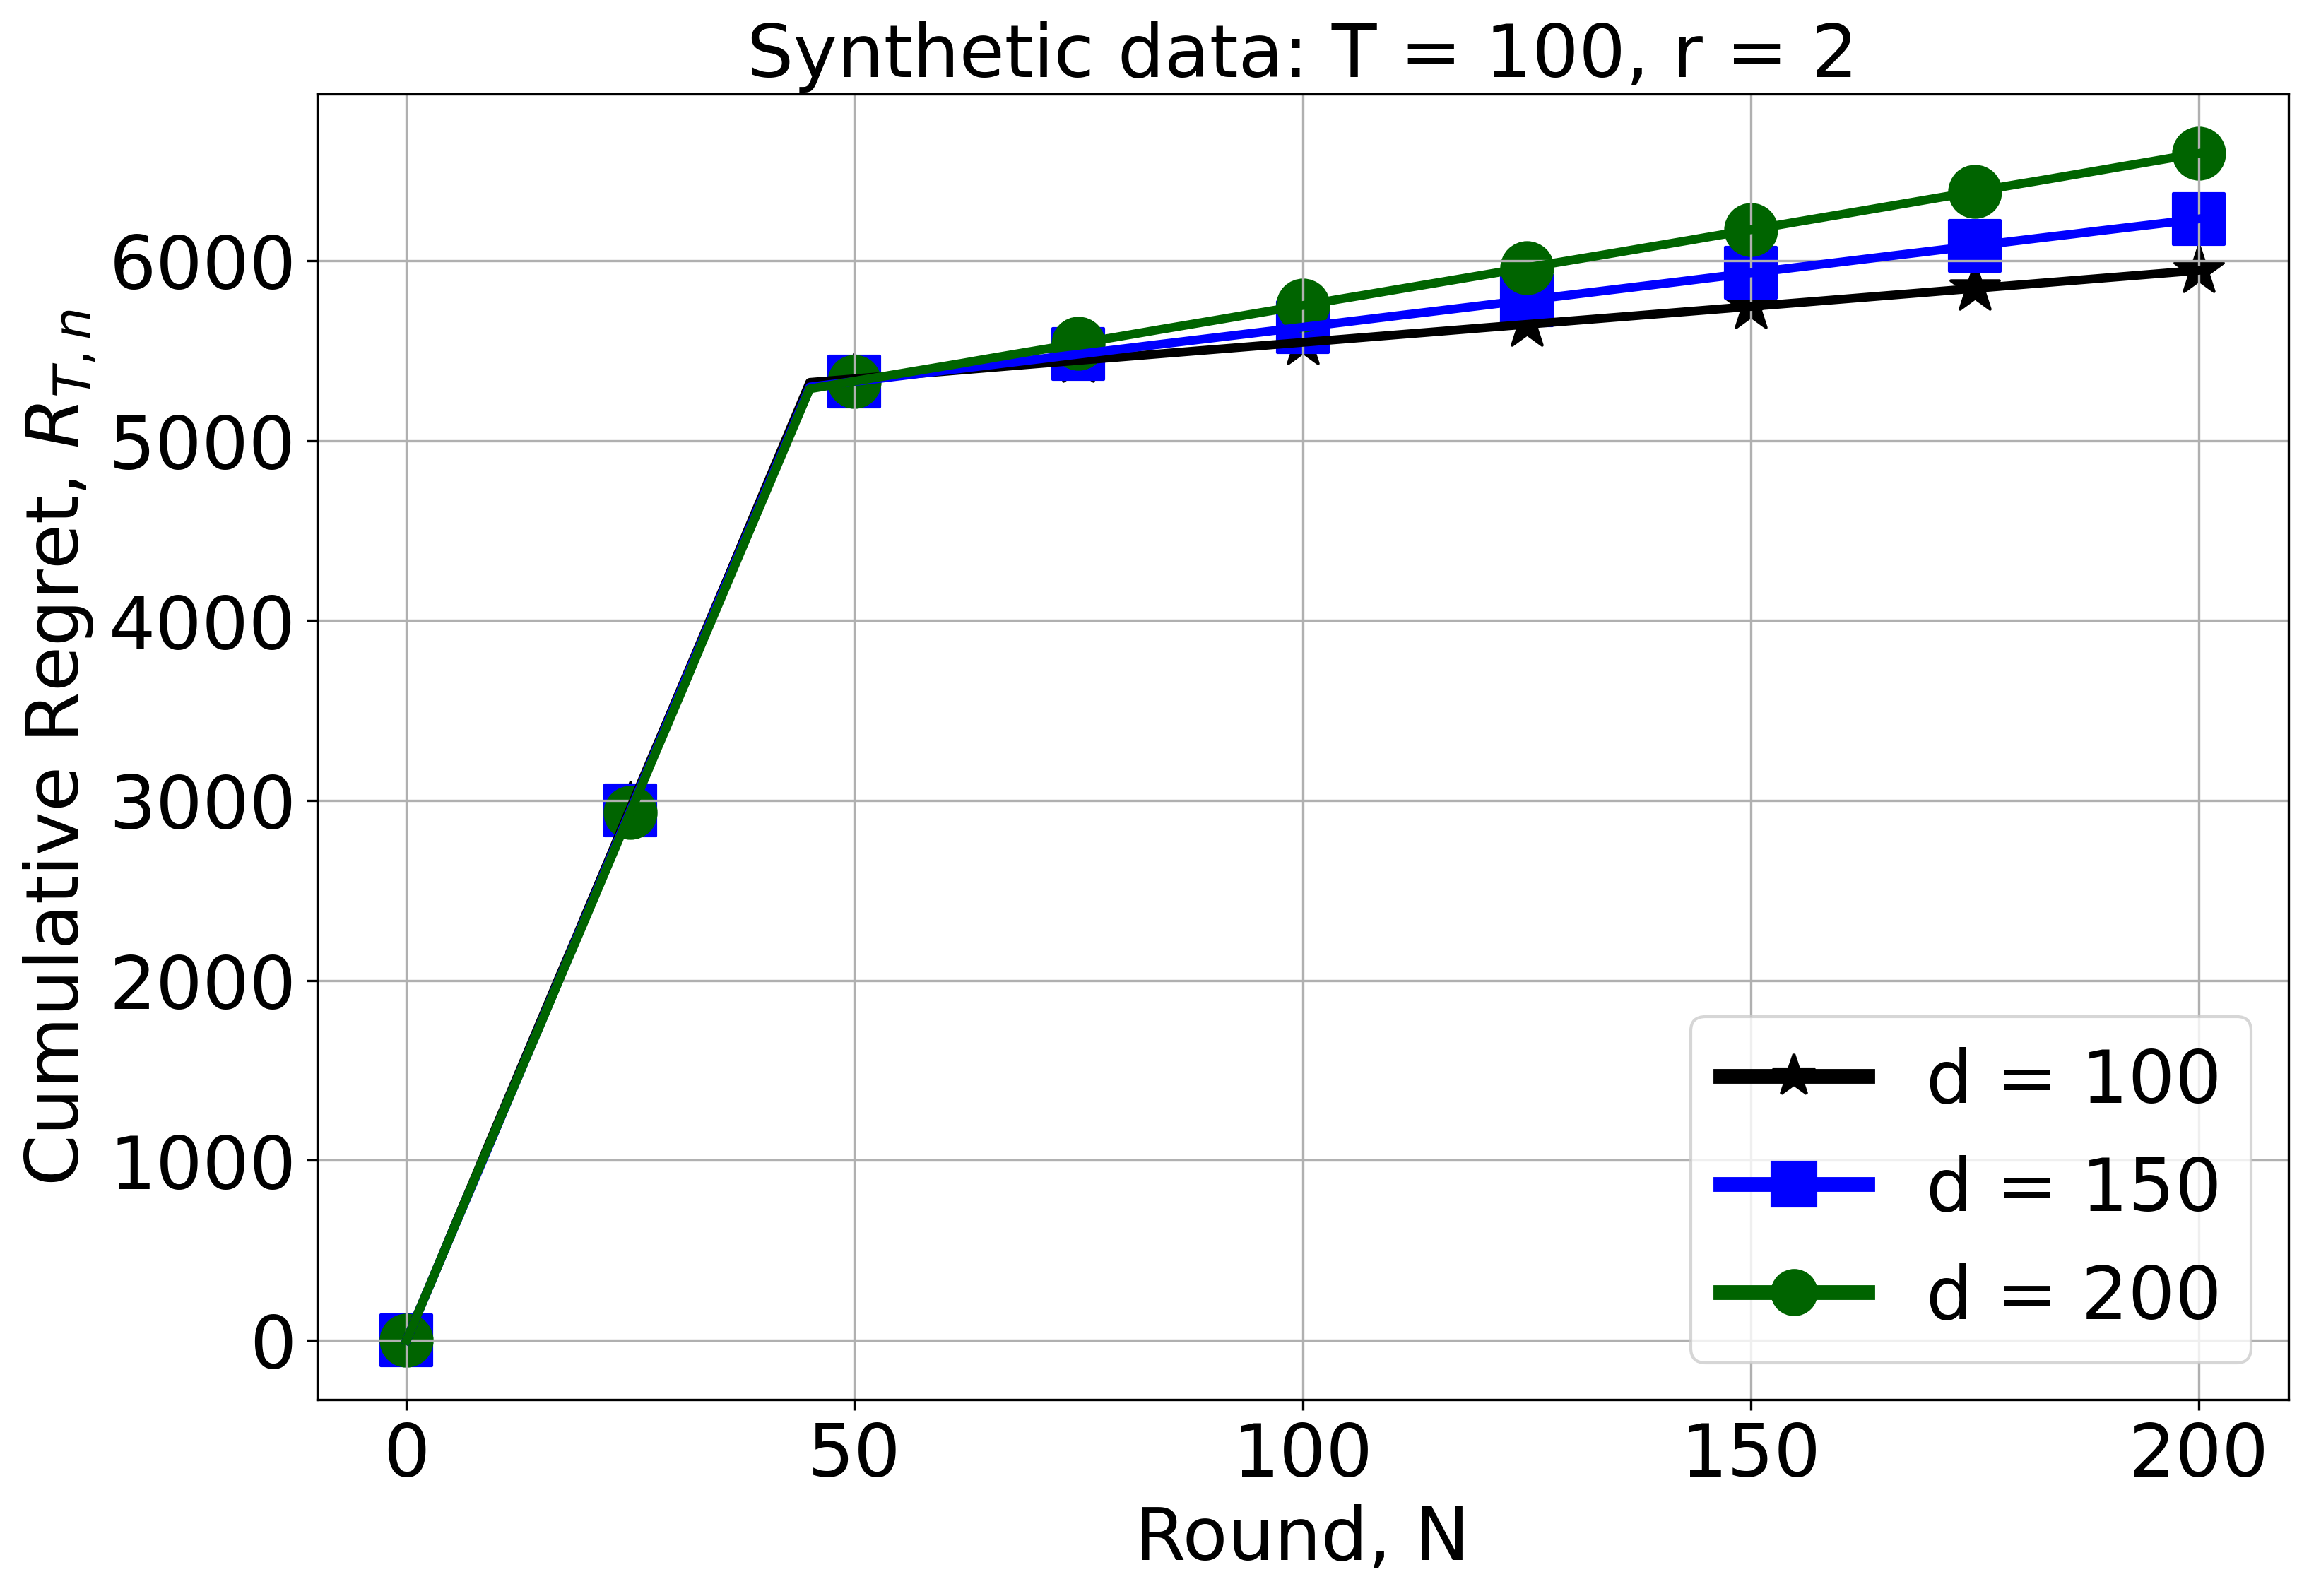

In [7]:
plt.figure(figsize=(12, 8), dpi = 300)

colors = (['black', 'blue', 'darkgreen', 'purple', 'darkred', 'grey'])
markers = ['*', 's', 'o', 'X', '^', 'P']

plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rc('legend', fontsize = 25)

plt.plot(x_100, CR_100, color = colors[0], linewidth = 3, label = 'd = 100')
plt.scatter(x_100[::every_point], CR_100[::every_point], marker = markers[0], color = colors[0], s = 300, label = 'd = 100')
plt.plot(x_150, CR_150, color = colors[1], linewidth = 3, label = 'd = 150')
plt.scatter(x_150[::every_point], CR_150[::every_point], marker = markers[1], color = colors[1], s = 300, label = 'd = 150')
plt.plot(x_200, CR_200, color = colors[2], linewidth = 3, label = 'd = 200')
plt.scatter(x_200[::every_point], CR_200[::every_point], marker = markers[2], color = colors[2], s = 300, label = 'd = 200')

legend_elements = [mlines.Line2D([0], [0], color = colors[0], lw = 5, label = 'd = 100', marker = markers[0], markersize = 15),
                   mlines.Line2D([0], [0], color = colors[1], lw = 5, label = 'd = 150', marker = markers[1], markersize = 15),
                   mlines.Line2D([0], [0], color = colors[2], lw = 5, label = 'd = 200', marker = markers[2], markersize = 15)]

plt.grid(True)
plt.xlabel('Round, N', fontsize = 25)
plt.ylabel(r'Cumulative Regret, $R_{T, n}$', fontsize = 25)
plt.legend(handles=legend_elements)
plt.title('Synthetic data: T = 100, r = 2', fontsize = 25)
# plt.savefig('synthetic_cumulative_regret_Dimension.pdf', dpi = 600, bbox_inches = 'tight')
plt.show()
plt.close()

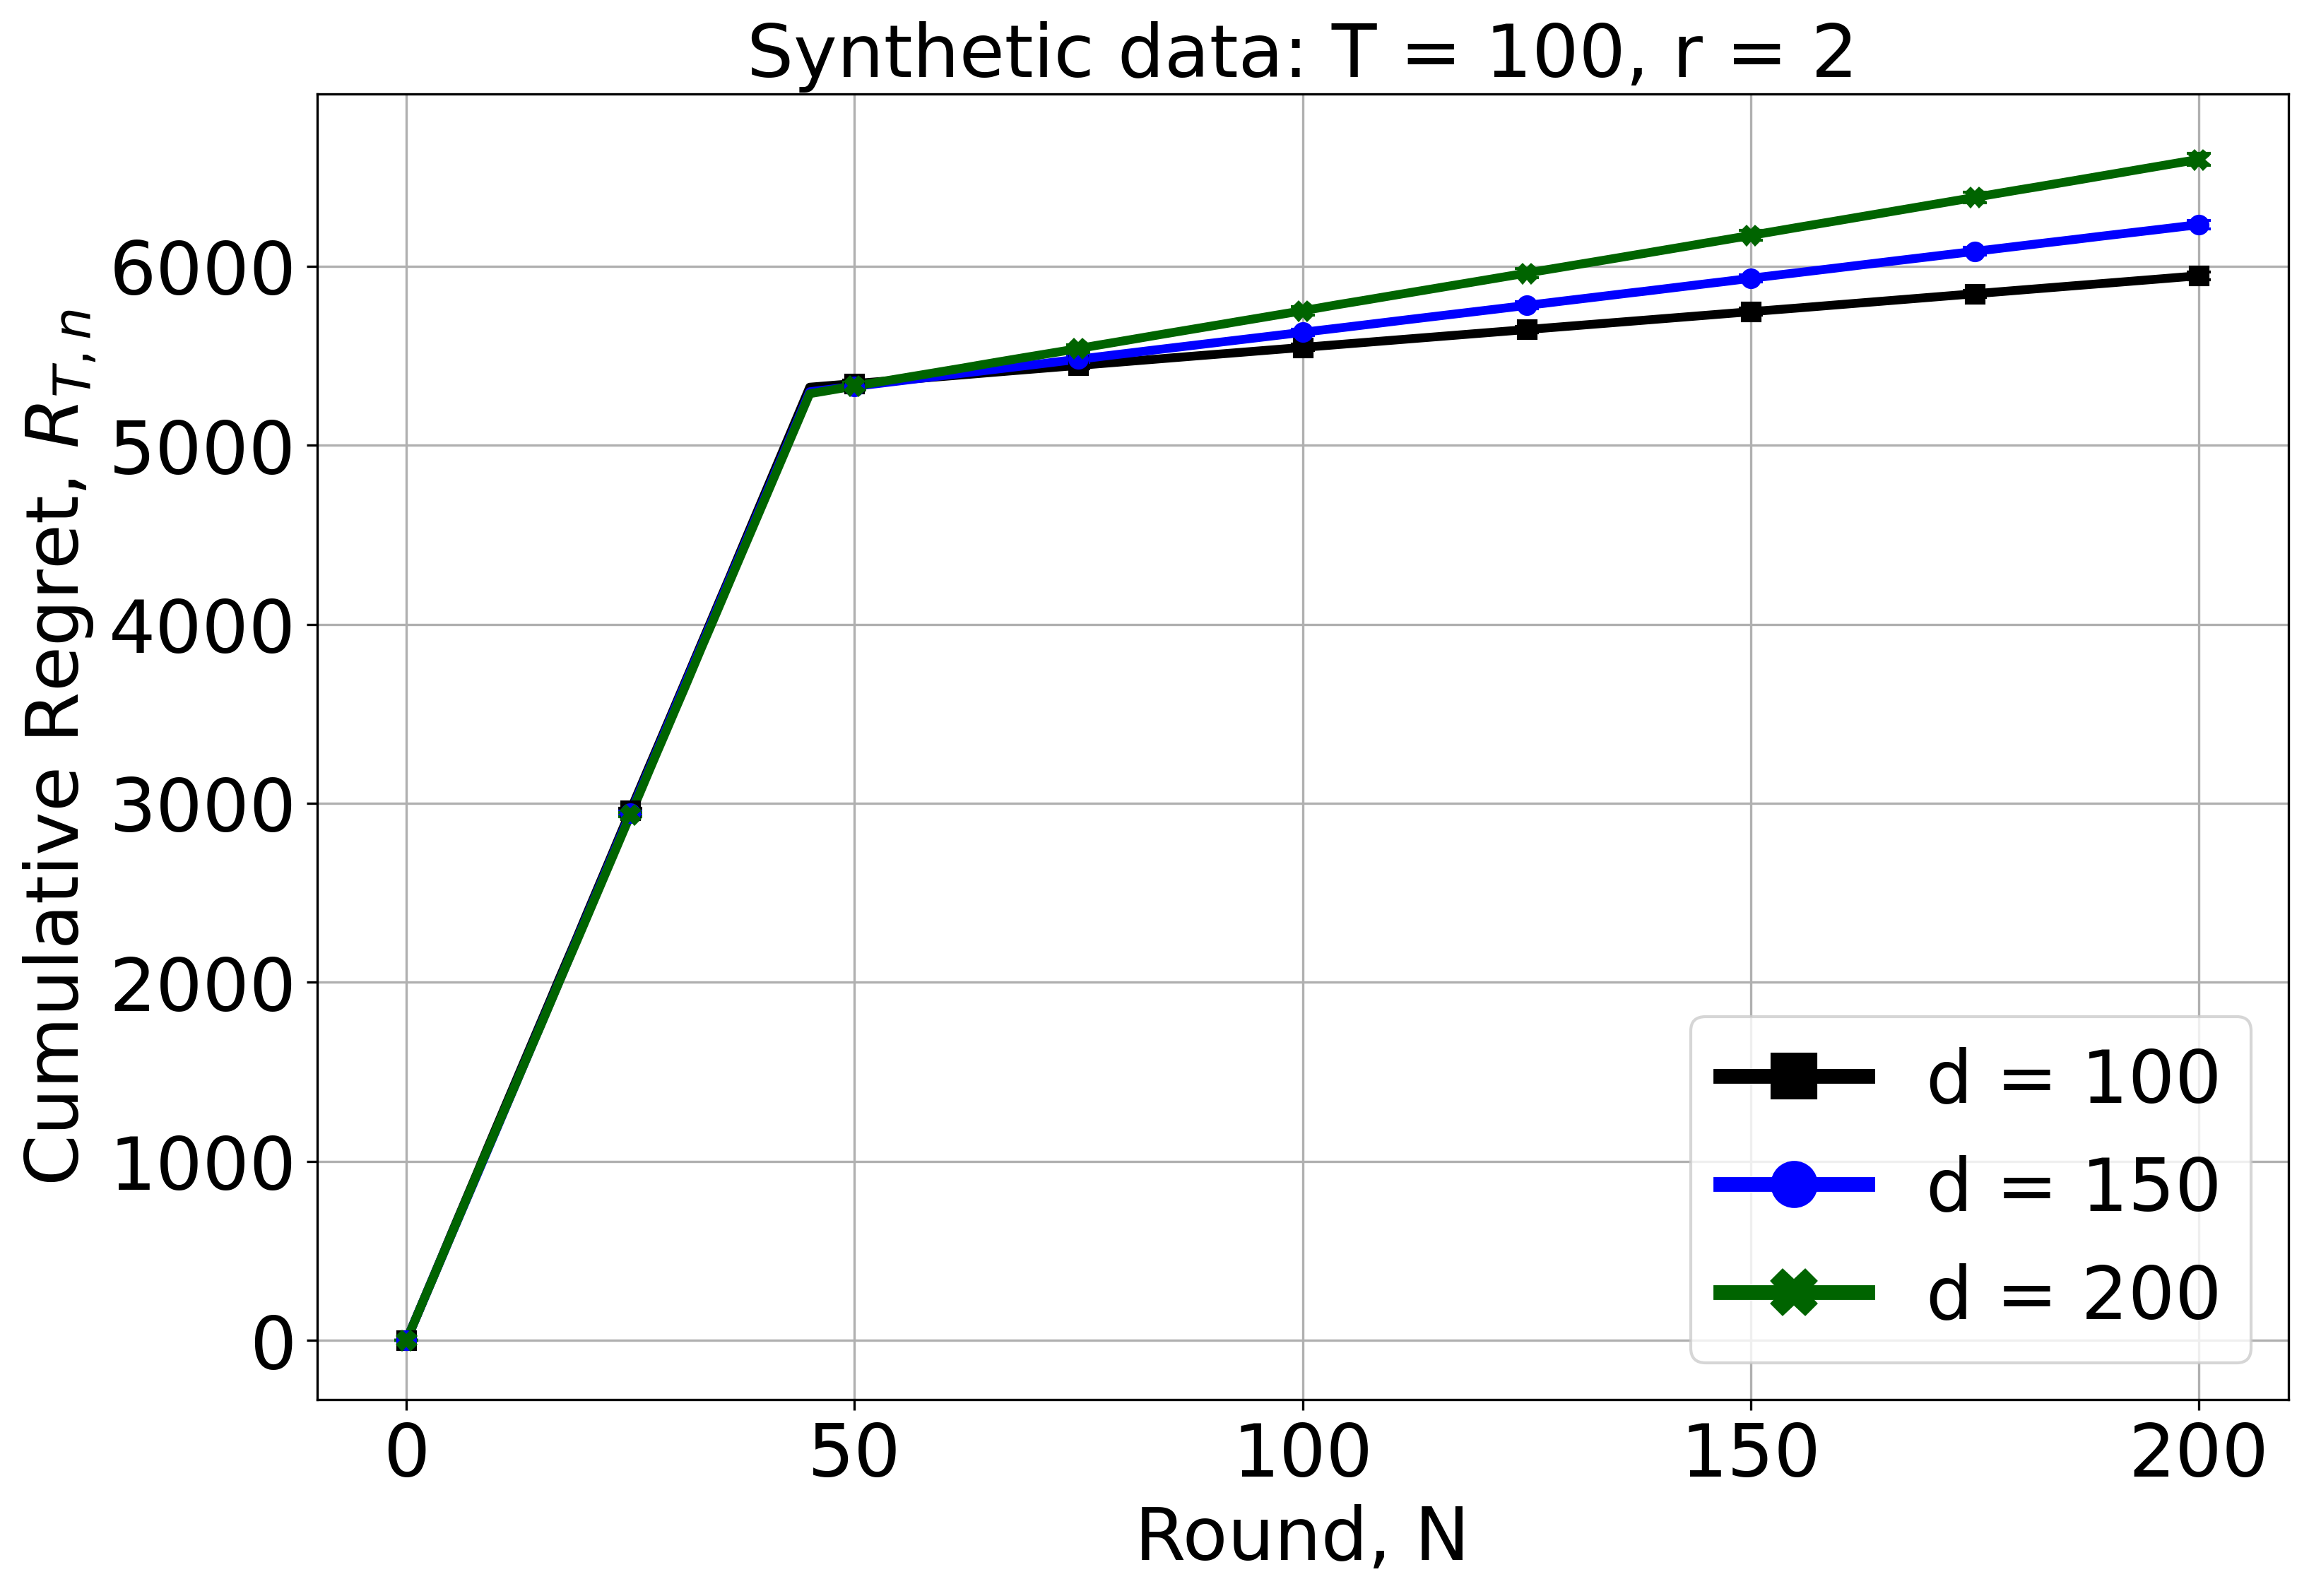

In [8]:
plt.figure(figsize=(12, 8), dpi = 300)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

colors = (['black', 'blue', 'darkgreen', 'purple', 'darkred', 'grey'])
markers = ['*', 's', 'o', 'X', '^', 'P']

plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rc('legend', fontsize = 25)

plt.plot(x_100, CR_100, color = colors[0], linewidth = 3, label = 'd = 100')
plt.errorbar(x_100[::every_point], CR_100[::every_point], yerr = std_100[::every_point], fmt = markers[1], color = colors[0], ecolor = colors[0], elinewidth = 2, capsize = 4)
plt.plot(x_150, CR_150, color = colors[1], linewidth = 3, label = 'd = 150')
plt.errorbar(x_150[::every_point], CR_150[::every_point], yerr = std_150[::every_point], fmt = markers[2], color = colors[1], ecolor = colors[1], elinewidth = 2, capsize = 4)
plt.plot(x_200, CR_200, color = colors[2], linewidth = 3, label = 'd = 200')
plt.errorbar(x_200[::every_point], CR_200[::every_point], yerr = std_200[::every_point], fmt = markers[3], color = colors[2], ecolor = colors[2], elinewidth = 2, capsize = 4)

legend_elements = [mlines.Line2D([0], [0], color = colors[0], lw = 5, label = 'd = 100', marker = markers[1], markersize = 15),
                   mlines.Line2D([0], [0], color = colors[1], lw = 5, label = 'd = 150', marker = markers[2], markersize = 15),
                   mlines.Line2D([0], [0], color = colors[2], lw = 5, label = 'd = 200', marker = markers[3], markersize = 15)]

plt.grid(True)
plt.xlabel('Round, N', fontsize = 25)
plt.ylabel(r'Cumulative Regret, $R_{T, n}$', fontsize = 25)
plt.legend(handles=legend_elements)
plt.title('Synthetic data: T = 100, r = 2', fontsize = 25)
plt.savefig('synthetic_cumulative_regret_Dimension_error_bar.pdf', dpi = 600, bbox_inches = 'tight')
plt.show()
plt.close()